In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
digits = pd.read_csv("../data/mnist.csv")
digits.shape

(1180, 6)

In [54]:
digits["true_label"].value_counts()

true_label
4    118
2    118
1    118
3    118
5    118
6    118
7    118
8    118
9    118
0    118
Name: count, dtype: int64

<Axes: xlabel='true_label', ylabel='Count'>

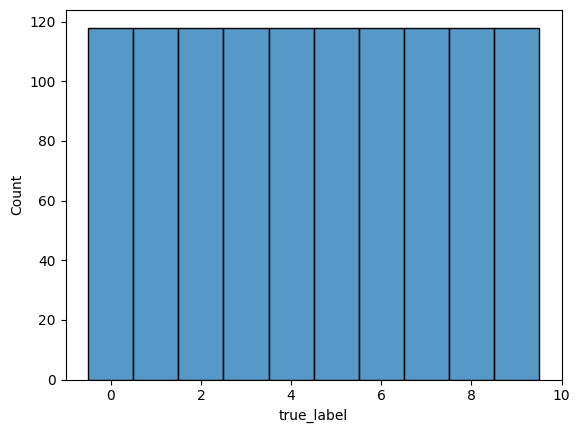

In [55]:
sns.histplot(digits, x="true_label", discrete=True)

## September

In [56]:
# get confidence distribution
sept = digits[digits["timestamp"].str[:1] == "9"]
oct = digits[digits["timestamp"].str[:2] == "10"]
nov = digits[digits["timestamp"].str[:2] == "11"]

In [57]:
sept.shape  # might need to fake data to create some more shapes (will need to use original model)

(527, 6)

In [58]:
oct.shape

(503, 6)

In [59]:
nov.shape

(150, 6)

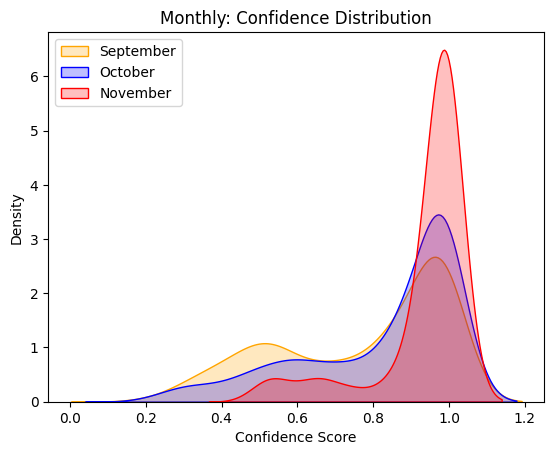

In [60]:
sns.kdeplot(sept, x="confidence", color="orange", fill=True, label="September")
sns.kdeplot(oct, x="confidence", color="blue", fill=True, label="October")
sns.kdeplot(nov, x="confidence", color="red", fill=True, label="November")
plt.title("Monthly: Confidence Distribution")  # no retrain at this point
plt.xlabel("Confidence Score")
plt.ylabel("Density")
plt.legend()

In [42]:
# dimensionality reduction preprocessing
import numpy as np
from PIL import Image

def load_image_as_vector(path):
    path = f".{path}"
    img = Image.open(path).convert("L")  # grayscale
    img = img.resize((28, 28))
    arr = np.array(img).flatten() / 255.0  # normalize
    return arr

# create matrix of image vectors
image_vectors = np.stack([load_image_as_vector(p) for p in digits["img_path"]])
print(image_vectors.shape)  # (n_samples, 784)


# PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(image_vectors)

digits["pca1"] = pca_result[:, 0]
digits["pca2"] = pca_result[:, 1]

# TSNE analysis
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(image_vectors)

digits["tsne1"] = tsne_result[:, 0]
digits["tsne2"] = tsne_result[:, 1]




(1130, 784)


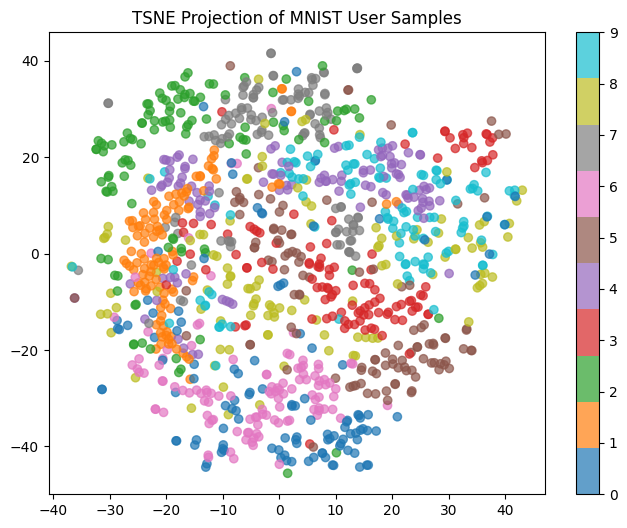

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(digits["tsne1"], digits["tsne2"], c=digits["true_label"], cmap="tab10", alpha=0.7)
plt.colorbar()
plt.title("TSNE Projection of MNIST User Samples")
plt.show()


In [44]:
tsne = TSNE(n_components=3, perplexity=30, n_iter=3000)
tsne_result = tsne.fit_transform(image_vectors)
print(tsne_result)

[[ 13.738875 -29.537191 -26.610632]
 [ 11.163063 -43.007492  -9.597076]
 [-51.771206  46.597527   4.096688]
 ...
 [-10.03816   39.989536  71.51219 ]
 [-51.82376  -21.337702  46.4107  ]
 [ 32.092003  28.154243  78.9484  ]]


0       4
1       2
2       1
3       1
4       1
       ..
1125    5
1126    6
1127    7
1128    8
1129    9
Name: true_label, Length: 1130, dtype: int64


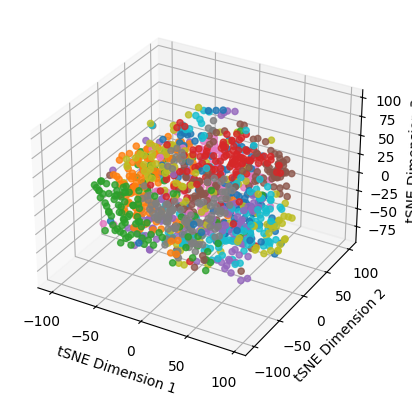

In [45]:
# graph visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = digits.true_label
print(colors)
ax.scatter(
    tsne_result[:,0],
    tsne_result[:,1],
    tsne_result[:,2],
    c=colors,
    cmap="tab10",
    alpha=0.8
)

ax.set_xlabel("tSNE Dimension 1")
ax.set_ylabel("tSNE Dimension 2")
ax.set_zlabel("tSNE Dimension 3")
plt.show()